In [1]:
import torch
import pandas as pd
import torch.nn as nn

In [3]:
path = 'C:/Users/jeanb/Documents/Python Scripts/DiveIntoDL/data/'
data = pd.read_csv(path + 'iris.csv')
# data.shape # 150, 5
# data.keys() # 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label = 'species'
train_idx = list(range(0, 40)) + list(range(50, 90)) + list(range(100, 140))
val_idx = list(range(40, 50)) + list(range(90, 100)) + list(range(140, 150))
# type(data['sepal_length'][val_idx])

# from text labels to id labels
label_idx = {}
idx = 0
for i in range(data.shape[0]):
    label_name = data[label][i]
    if label_name not in label_idx:
        label_idx[label_name] = idx
        idx += 1
print(label_idx)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [5]:
X_train = torch.zeros((len(train_idx), len(features)))
y_train = torch.zeros(len(train_idx))

X_val = torch.zeros((len(val_idx), len(features)))
y_val = torch.zeros(len(val_idx))

for i, k in enumerate(features):
    X_train[:, i] = torch.tensor(data[k][train_idx].values, dtype=torch.float32)
    X_val[:, i] = torch.tensor(data[k][val_idx].values, dtype=torch.float32)


for i, j in enumerate(train_idx):
    idx = label_idx[ data[label][j] ]
    y_train[i] = torch.tensor(idx)

for i, j in enumerate(val_idx):
    idx = label_idx[ data[label][j] ]
    y_val[i] = torch.tensor(idx)


print("Training:", X_train.shape, y_train.shape)
print("Evaluation:", X_val.shape, y_val.shape)


Training: torch.Size([120, 4]) torch.Size([120])
Evaluation: torch.Size([30, 4]) torch.Size([30])


In [6]:
def euclidean_distance(X_train, X_test_point):
    # Subtract the test point from each training point and compute the squared distances
    distances = torch.sum((X_train - X_test_point) ** 2, dim=1)
    return torch.sqrt(distances)

In [7]:
# Define the KNN classifier function
def knn(X_train, y_train, X_test, K):
    y_pred = []
    
    for X_test_point in X_test:
        # Compute distances from the test point to all training points
        distances = euclidean_distance(X_train, X_test_point)
        
        # Get the indices of the K nearest neighbors
        nearest_neighbors = torch.argsort(distances)[:K]
        
        # Get the labels of the K nearest neighbors
        nearest_labels = y_train[nearest_neighbors]
        
        # Perform a majority vote to predict the label
        predicted_label = torch.mode(nearest_labels).values.item()
        y_pred.append(predicted_label)
    
    return torch.tensor(y_pred)

In [8]:
# Set the value of K
K = 5

# Make predictions on the test set
y_pred = knn(X_train, y_train, X_val, K)

# Evaluate the accuracy
accuracy = torch.sum(y_pred == y_val).item() / len(y_val)
print(f"KNN Model Accuracy: {accuracy * 100:.2f}%")

KNN Model Accuracy: 100.00%


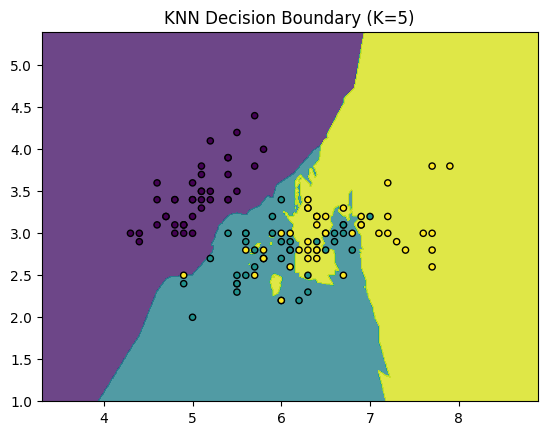

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(X_train, y_train, K):
    # Create a mesh grid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid and make predictions
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = knn(X_train[:, :2], y_train, grid_points, K)
    Z = Z.numpy().reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
    plt.title(f"KNN Decision Boundary (K={K})")
    plt.show()

# Plot decision boundary using the first two features of the Iris dataset
plot_decision_boundary(X_train[:, :2], y_train, K=5)